## **Developing Prediction Model of Amazon employee access using Machine & Deep Learning**
Deepti Kulkarni - Capstone project (Spring 2020 – BAN 693T)



## **Project Objective** 

Dataset: Kaggle amazon employee access challenge dataset

The objective of this competition is to build a model, learned using historical data, that will determine an employee's access needs, such that manual access transactions (grants and revokes) are minimized as the employee's attributes change over time. The model will take an employee's role information and a resource code and will return whether or not access should be granted.

The data consists of real historical data collected from 2010 & 2011.  Employees are manually allowed or denied access to resources over time. You must create an algorithm capable of learning from this historical data to predict approval/denial for an unseen set of employees. 

File Descriptions
train.csv - The training set. Each row has the ACTION (ground truth), RESOURCE, and information about the employee's role at the time of approval

test.csv - The test set for which predictions should be made.  Each row asks whether an employee having the listed characteristics should have access to the listed resource.



### **Project Code Index**

1. Data collection - Import and Read Data
2. Data Pre-processing
  
   a. Data Transformation
   
   b. Data Splitting

4. Models

   a. Model 1 - Logistic Regression Model 

   b. Model 2 - Stochastic Gradient Descent (SGD)

   c. Model 3 - Support Vector Machines (SVM)

   d. Model 4 - Dense Neural Network Model (DNN)

   e. Model 4 - Dense Neural Network L1 Model (DNN- L1)
5. Model comparision and Conclusion

## **1. Data collection- Import and Read Data**

In [0]:
#Importing all necessory librariies

import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn import svm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Reading training dataset

train_dataframe = pd.read_csv("/content/train.csv", sep=",")
train_dataframe = train_dataframe.reindex(np.random.permutation(train_dataframe.index))

train_dataframe.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
28764,1,81001,7424,5110,117954,122672,118777,306530,308574,118779
9720,1,31661,21023,117961,118052,118992,307024,311622,118331,118332
31462,1,42056,14952,117961,117962,119223,118278,118260,290919,118279
18826,1,15022,56199,117961,118052,118706,117905,117906,290919,117908
659,1,44814,1938,117961,118300,118066,120988,134839,118643,120989


In [0]:
# Reading test dataset

test_dataframe = pd.read_csv("/content/test.csv", sep=",")
test_dataframe = test_dataframe.reindex(np.random.permutation(test_dataframe.index))

test_dataframe.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
12897,12898,18405,5396,117961,118343,120270,120773,118959,118960,120774
24407,24408,97529,782,117961,118413,127522,118321,117906,290919,118322
49218,49219,935,3869,117961,118225,120050,118321,117906,290919,118322
57192,57193,25993,4031,117961,118300,120026,118422,239205,118424,118425
7334,7335,34449,51235,120864,121013,124133,120344,303717,118424,120346


In [0]:
#Checking dataframe shapes for both datasets 

print("Training dataframe shape: ",train_dataframe.shape)
print("Test dataframe shape: ",test_dataframe.shape)

Training dataframe shape:  (32769, 10)
Test dataframe shape:  (58921, 10)


1    30872
0     1897
Name: ACTION, dtype: int64


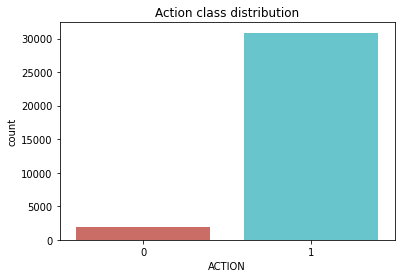

<Figure size 432x288 with 0 Axes>

In [0]:
# checking count of each categories for the target variable in the training dataframe 

print(train_dataframe['ACTION'].value_counts())
sns.countplot(x='ACTION',data = train_dataframe, palette='hls')
plt.title("Action class distribution")
plt.show() 
plt.savefig('count_plot_training')

## **2. Data Preprocessing**

In [0]:
#1. Handling Missing Data
# Checking if there is any missing value in the dataset 

train_dataframe.isnull().sum()

#2. Handling Outliers
# As the dataset contains categoral and binary data, there is no need to check outliers as categiorical data means 
# It's just the composition of the sample which you have selected.

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [0]:
#3. Feature selection
#As there are no missing values and outliers, let's proceed with finding unique categories for each column
train_dataframe.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

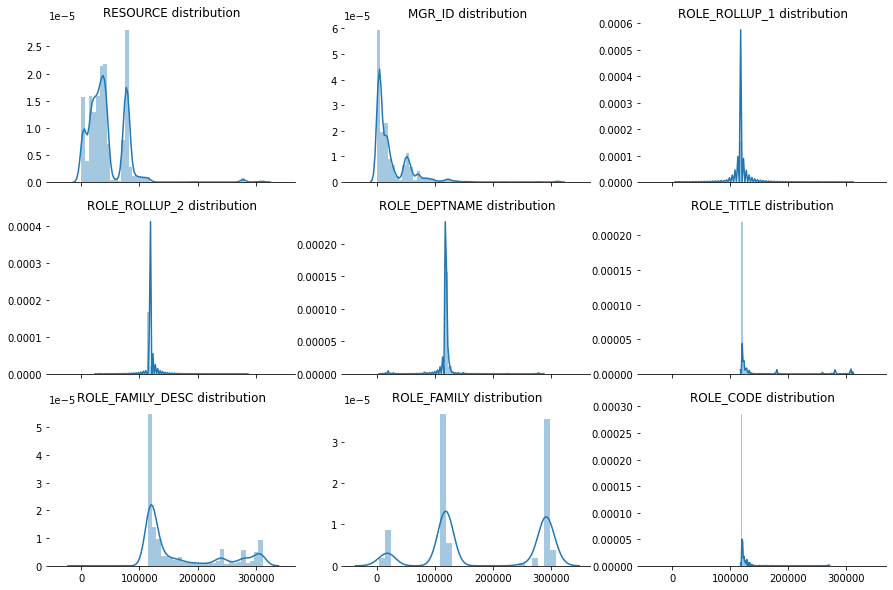

In [0]:
# Checking distributions of all variables 
f, axes = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
sns.despine(left=True)

# distribution of RESOURCE
RESOURCE= sns.distplot(train_dataframe['RESOURCE'].values, ax = axes[0,0])
RESOURCE.title.set_text("RESOURCE distribution")

# distribution of MGR_ID
MGR_ID= sns.distplot(train_dataframe['MGR_ID'].values, ax = axes[0,1])
MGR_ID.title.set_text("MGR_ID distribution")

# distribution of ROLE_ROLLUP_1
ROLE_ROLLUP_1= sns.distplot(train_dataframe['ROLE_ROLLUP_1'].values, ax = axes[0,2])
ROLE_ROLLUP_1.title.set_text("ROLE_ROLLUP_1 distribution")

# distribution of ROLE_ROLLUP_2
ROLE_ROLLUP_2= sns.distplot(train_dataframe['ROLE_ROLLUP_2'].values, ax = axes[1,0])
ROLE_ROLLUP_2.title.set_text("ROLE_ROLLUP_2 distribution")

# distribution of ROLE_DEPTNAME
ROLE_DEPTNAME= sns.distplot(train_dataframe['ROLE_DEPTNAME'].values, ax = axes[1,1])
ROLE_DEPTNAME.title.set_text("ROLE_DEPTNAME distribution")

# distribution of ROLE_TITLE
ROLE_TITLE= sns.distplot(train_dataframe['ROLE_TITLE'].values, ax = axes[1,2])
ROLE_TITLE.title.set_text("ROLE_TITLE distribution")

# distribution of ROLE_FAMILY_DESC
ROLE_FAMILY_DESC= sns.distplot(train_dataframe['ROLE_FAMILY_DESC'].values, ax = axes[2,0])
ROLE_FAMILY_DESC.title.set_text("ROLE_FAMILY_DESC distribution")

# distribution of ROLE_FAMILY
ROLE_FAMILY= sns.distplot(train_dataframe['ROLE_FAMILY'].values, ax = axes[2,1])
ROLE_FAMILY.title.set_text("ROLE_FAMILY distribution")

# distribution of ROLE_CODE
ROLE_CODE= sns.distplot(train_dataframe['ROLE_CODE'].values, ax = axes[2,2])
ROLE_CODE.title.set_text("ROLE_CODE distribution")

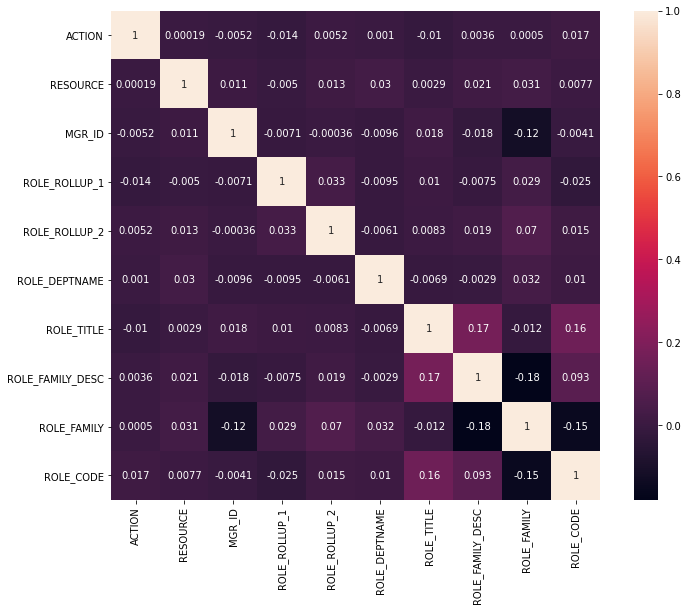

In [0]:
# heat map of correlation of features
# They all have weak correlation with the target variable 

correlation_matrix = train_dataframe.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=1,square = True, annot=True)
plt.show()

In [0]:
# checking correlation between ROLE_TITLE, ROLE_CODE
# They have weak correlation as well so we will not be dropping any variables.

print(train_dataframe[["ROLE_TITLE","ROLE_CODE"]].corr())

            ROLE_TITLE  ROLE_CODE
ROLE_TITLE     1.00000    0.15592
ROLE_CODE      0.15592    1.00000


### **2.a. Data Transformation**

In [0]:
#As seen in the last result, there are some categorical variables hence using One hot encoder to transform data for analysis

one_hot_encoder = OneHotEncoder(sparse=True, dtype=np.float32, handle_unknown='ignore')

# Using One hot encoding on training dataset 
X_train_columns = [x for x in train_dataframe.columns if x!="ACTION"]
X = one_hot_encoder.fit_transform(train_dataframe[X_train_columns])

# Using One hot encoding on test dataset 
X_test_columns = [x for x in test_dataframe.columns if x!="id"]
X_test = one_hot_encoder.transform(test_dataframe[X_test_columns])

#Splitting target variable in y for training dataset 
y = train_dataframe["ACTION"].values

In [0]:
# Checking the data after one hot encoding
print("Training data: ",X[4])
print("\n Training Target: ",y)

print("\n Test data: ",X_test[1])

Training data:    (0, 1556)	1.0
  (0, 11140)	1.0
  (0, 11782)	1.0
  (0, 11947)	1.0
  (0, 12283)	1.0
  (0, 12634)	1.0
  (0, 14126)	1.0
  (0, 15229)	1.0
  (0, 15411)	1.0

 Training Target:  [1 1 1 ... 1 1 1]

 Test data:    (0, 881)	1.0
  (0, 10467)	1.0
  (0, 11814)	1.0
  (0, 11952)	1.0
  (0, 12153)	1.0
  (0, 12567)	1.0
  (0, 15205)	1.0
  (0, 15230)	1.0
  (0, 15339)	1.0


### **2.b.Data Splitting**

In [0]:
#Spittting Training dataset into training and validation datasets (validation dataset= 20%, Training dataset = 80%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1) 

In [0]:
#Checking dataframe shapes after splitting and one hot encoding (which are now sparse matrix, which will be easy for analysis) 

print("Training dataframe shape: ", X_train.shape)
print("Validation dataframe shape: ",X_val.shape)
print("Test dataframe shape: ",X_test.shape)

Training dataframe shape:  (26215, 15626)
Validation dataframe shape:  (6554, 15626)
Test dataframe shape:  (58921, 15626)


## **3. Models** 

###**a. Model 1 - Logistic Regression Model**

In [0]:
# Building Logistic regression model 

model_logisticRegression = LogisticRegression( random_state=623,
                                               solver = 'saga',
                                               max_iter = 10000,
                                               warm_start = False,
                                               verbose = 1, 
                                               tol = 1e-5)

In [0]:
# Cross validating the Logistic regression model to check the score and summary of the model
statistics_cv = cross_validate(model_logisticRegression, X_train, y_train, groups=None, scoring='roc_auc', cv=5, n_jobs=2, return_train_score = True)

# Describing the summary of the Logistic regression model 
statistics_cv = pd.DataFrame(statistics_cv)
statistics_cv.describe()

,fit_time,score_time,test_score,train_score
count,5.000000,5.000000,5.000000,5.000000
mean,10.136170,0.003890,0.846585,0.977533
std,1.440848,0.000585,0.014719,0.000701
min,7.672920,0.002897,0.831398,0.976747
25%,10.476750,0.003977,0.836390,0.976908
50%,10.486418,0.004013,0.844980,0.977567
75%,10.560235,0.004120,0.850990,0.978165
max,11.484528,0.004444,0.869169,0.978280


In [0]:
# Model Fitting

model_logisticRegression_history = model_logisticRegression.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 1030 epochs took 9 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s finished


In [0]:
# Model evaluation

Accuracy_Logistic_Regression = model_logisticRegression_history.score(X_val, y_val)
print("Accuracy of Logistic Regression Model- Validation Dataset: %.3f%%" % (Accuracy_Logistic_Regression*100.0))

Accuracy of Logistic Regression Model- Validation Dataset: 94.736%


In [0]:
# Model evaluation

Accuracy_Logistic_Regression = model_logisticRegression_history.score(X_train, y_train)
print("Accuracy of Logistic Regression Model- Training Dataset: %.3f%%" % (Accuracy_Logistic_Regression*100.0))

Accuracy of Logistic Regression Model- Training Dataset: 96.029%


In [0]:
# Confusion matrix for Validation dataset 

y_val_predictions = model_logisticRegression_history.predict(X_val)
cm = metrics.confusion_matrix(y_val, y_val_predictions)
print(cm)

[[  54  315]
 [  30 6155]]


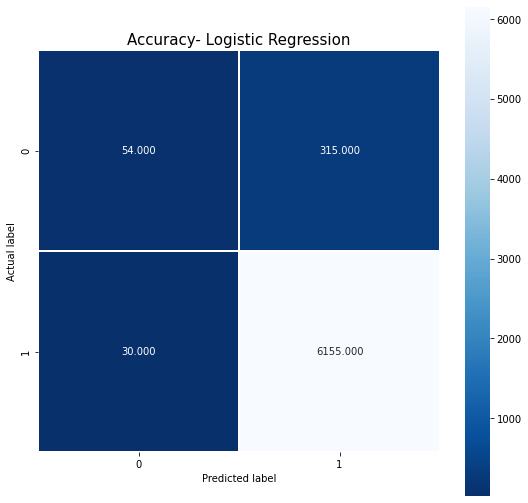

In [0]:
# Heat map for the confusion matrix

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Accuracy- Logistic Regression", size = 15); 

In [0]:
# Misclassification rate 

print("Misclassifcation rate of Logistic regression model: ", 
      (((cm[0][1] + cm[1][0])/cm.sum())*100), "%")

Misclassifcation rate of Logistic regression model:  5.26396093988404 %


In [0]:
# Checking Logistic regression model summary of validation dataset 

print(classification_report(y_val, y_val_predictions))

              precision    recall  f1-score   support

           0       0.64      0.15      0.24       369
           1       0.95      1.00      0.97      6185

    accuracy                           0.95      6554
   macro avg       0.80      0.57      0.61      6554
weighted avg       0.93      0.95      0.93      6554



In [0]:
# Model prediction of Test dataset

y_test = model_logisticRegression_history.predict(X_test)

In [0]:
# saving predictions in dataframe

y_test_predictions = pd.DataFrame()
y_test_predictions["id"] = test_dataframe["id"]
y_test_predictions["ACTION"] = y_test
print(y_test_predictions)

# Saving results to csv file

y_test_predictions.to_csv("submission.csv", index = False)

          id  ACTION
30919  30920       1
4015    4016       1
49989  49990       1
9996    9997       1
6647    6648       1
...      ...     ...
49014  49015       1
54362  54363       1
31385  31386       1
19735  19736       1
7751    7752       1

[58921 rows x 2 columns]


1    58037
0      884
Name: ACTION, dtype: int64


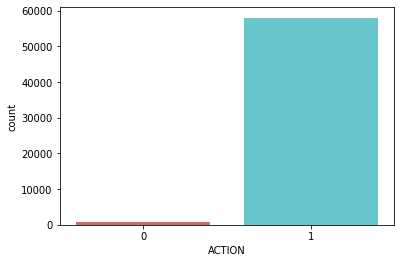

<Figure size 432x288 with 0 Axes>

In [0]:
# Finding ACTION target variable for test dataframe

print(y_test_predictions['ACTION'].value_counts())
sns.countplot(x='ACTION',data = y_test_predictions, palette='hls')
plt.show() 
plt.savefig('count_plot')

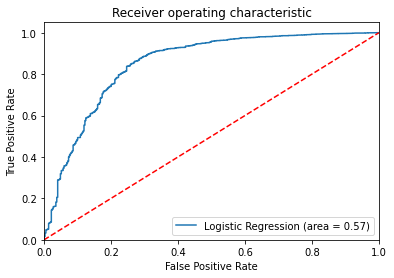

In [0]:
# ROC curve for Logistic regression model
# The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. 
# The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

logit_roc_auc = roc_auc_score(y_val, model_logisticRegression_history.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, model_logisticRegression_history.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()









### **b. Model 2 - Stochastic Gradient Descent (SGD)**

In [0]:
# Building stochastic gradient descent model

model_SGDClassifier = SGDClassifier(loss="log", penalty="l2", max_iter=5)

# Cross validating the Logistic regression model to check the score and summary of the model
statistics_cv = cross_validate(model_SGDClassifier, X_train, y_train, groups=None, scoring='roc_auc', cv=5, n_jobs=2, return_train_score = True)
statistics_cv = pd.DataFrame(statistics_cv)
statistics_cv.describe()

,fit_time,score_time,test_score,train_score
count,5.000000,5.000000,5.000000,5.000000
mean,0.041410,0.004298,0.832447,0.949008
std,0.008309,0.000840,0.012683,0.003564
min,0.028054,0.002915,0.820400,0.944744
25%,0.040158,0.004335,0.821617,0.945832
50%,0.043386,0.004427,0.829061,0.950395
75%,0.045221,0.004626,0.842060,0.950968
max,0.050230,0.005185,0.849095,0.953103


In [0]:
# Model Fitting

model_SGDClassifier_history = model_SGDClassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
# Model evaluation

Accuracy_SGDClassifier = model_SGDClassifier_history.score(X_train, y_train)
print("Accuracy of SGDClassifier Model- Training Dataset: %.3f%%" % (Accuracy_SGDClassifier*100.0))

Accuracy of SGDClassifier Model- Training Dataset: 94.930%


In [0]:
# Model evaluation

Accuracy_SGDClassifier = model_SGDClassifier_history.score(X_val, y_val)
print("Accuracy of SGDClassifier Model- - Validation Dataset: %.3f%%" % (Accuracy_SGDClassifier*100.0))

Accuracy of SGDClassifier Model- - Validation Dataset: 94.309%


In [0]:
#Confusion matrix for Validation dataset 

y_val_predictions = model_SGDClassifier_history.predict(X_val)
cm_sgd = metrics.confusion_matrix(y_val, y_val_predictions)
print(cm_sgd)

[[  27  358]
 [  15 6154]]


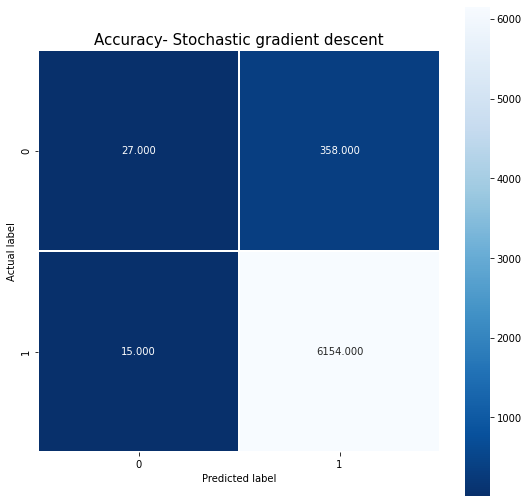

In [0]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_sgd, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Accuracy- Stochastic gradient descent", size = 15); 

In [0]:
# Misclassification rate 

print("Misclassifcation rate of Stochastic gradient descent model: ", 
      (((cm_sgd[0][1] + cm_sgd[1][0])/cm_sgd.sum())*100), "%")

Misclassifcation rate of Stochastic gradient descent model:  5.69118095819347 %


In [0]:
# Checking accuracy on validation dataset using model

print(classification_report(y_val, y_val_predictions))

              precision    recall  f1-score   support

           0       0.64      0.07      0.13       385
           1       0.95      1.00      0.97      6169

    accuracy                           0.94      6554
   macro avg       0.79      0.53      0.55      6554
weighted avg       0.93      0.94      0.92      6554



In [0]:
# Model Prediction

y_test = model_SGDClassifier_history.predict(X_test)

In [0]:
#saving predictions in dataframe

y_test_predictions = pd.DataFrame()
y_test_predictions["id"] = test_dataframe["id"]
y_test_predictions["ACTION"] = y_test
print(y_test_predictions)

#Saving results to csv file

y_test_predictions.to_csv("submission.csv", index = False)

          id  ACTION
12897  12898       1
24407  24408       1
49218  49219       1
57192  57193       1
7334    7335       1
...      ...     ...
16782  16783       1
35294  35295       1
17732  17733       1
18117  18118       1
4609    4610       1

[58921 rows x 2 columns]


1    58543
0      378
Name: ACTION, dtype: int64


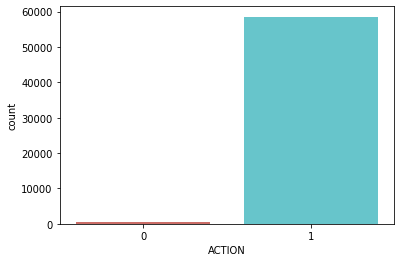

<Figure size 432x288 with 0 Axes>

In [0]:
print(y_test_predictions['ACTION'].value_counts())
sns.countplot(x='ACTION',data = y_test_predictions, palette='hls')
plt.show() 
plt.savefig('count_plot')

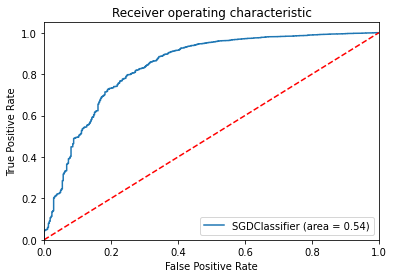

In [0]:
#ROC Curve for SGD(Stochastic gradient descent)
# The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. 
# The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

logit_roc_auc = roc_auc_score(y_val, model_SGDClassifier_history.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, model_SGDClassifier_history.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SGDClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### **c. Model 3 - Support Vector Machines (SVM)**

In [0]:
# Building Support Vector Machines (SVM) model 

model_svm = svm.SVC()

In [0]:
# Cross validating the Support Vector Machines (SVM) model to check the score and summary of the model

statistics_cv = cross_validate(model_svm, X_train, y_train, groups=None, scoring='roc_auc', cv=5, n_jobs=2, return_train_score = True)

statistics_cv = pd.DataFrame(statistics_cv)
statistics_cv.describe()

,fit_time,score_time,test_score,train_score
count,5.000000,5.000000,5.000000,5.000000
mean,47.451154,4.001252,0.844721,0.995804
std,6.358854,0.717493,0.014891,0.000551
min,36.244400,2.725279,0.826490,0.995316
25%,48.704055,4.229540,0.834960,0.995362
50%,50.089489,4.258087,0.842771,0.995543
75%,50.453260,4.384859,0.857786,0.996360
max,51.764568,4.408493,0.861596,0.996440


In [0]:
# Model Fitting

model_svm_history = model_svm.fit(X_train, y_train)

In [0]:
#Confusion matrix for Validation dataset 

y_val_predictions = model_svm_history.predict(X_val)
cm_svm = metrics.confusion_matrix(y_val, y_val_predictions)
print(cm_svm)

[[  58  327]
 [  31 6138]]


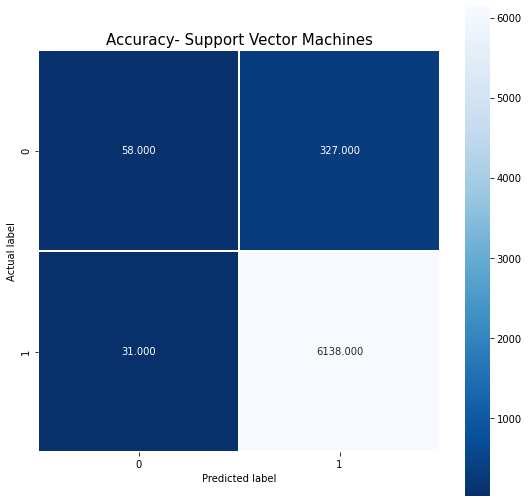

In [0]:
# Heat map for the confusion matrix

plt.figure(figsize=(9,9))
sns.heatmap(cm_svm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title("Accuracy- Support Vector Machines", size = 15); 

In [0]:
# Misclassification rate 

print("Misclassifcation rate of SVM Model: ", 
      (((cm_svm[0][1] + cm_svm[1][0])/cm_svm.sum())*100), "%")

Misclassifcation rate of SVM Model:  5.46231309124199 %


In [0]:
# Checking accuracy on validation dataset using model

print(classification_report(y_val, y_val_predictions))

              precision    recall  f1-score   support

           0       0.65      0.15      0.24       385
           1       0.95      0.99      0.97      6169

    accuracy                           0.95      6554
   macro avg       0.80      0.57      0.61      6554
weighted avg       0.93      0.95      0.93      6554



In [0]:
# Model accuracy

Accuracy_svm = model_svm_history.score(X_train, y_train)
print("Accuracy of SVM Model- Training dataset: %.3f%%" % (Accuracy_svm*100.0))

Accuracy of SVM Model- Training dataset: 95.758%


In [0]:
# Model evaluation

Accuracy_svm = model_svm_history.score(X_val, y_val)
print("Accuracy of SVM Model- - Validation Dataset: %.3f%%" % (Accuracy_svm*100.0))

Accuracy of SVM Model- - Validation Dataset: 94.538%


In [0]:
#Predicting test dataset 

y_test = model_svm_history.predict(X_test)

In [0]:
#saving predictions in dataframe
y_test_predictions = pd.DataFrame()
y_test_predictions["id"] = test_dataframe["id"]
y_test_predictions["ACTION"] = y_test
print(y_test_predictions)

#Saving results to csv file
y_test_predictions.to_csv("submission.csv", index = False)

          id  ACTION
12897  12898       1
24407  24408       1
49218  49219       1
57192  57193       1
7334    7335       1
...      ...     ...
16782  16783       1
35294  35295       1
17732  17733       1
18117  18118       1
4609    4610       1

[58921 rows x 2 columns]


In [0]:
# Finding ACTION target variable for test dataframe

count_Class= y_test_predictions['ACTION'].value_counts()

print("Count of ACTION variable: \n",count_Class)

Count of ACTION variable: 
 1    58095
0      826
Name: ACTION, dtype: int64


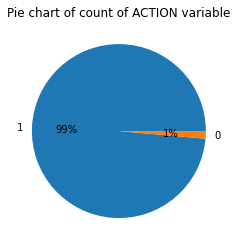

In [0]:
# Pie chart for counts of ACTION target variable for test dataframe

count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart of count of ACTION variable')
plt.ylabel('')
plt.show()









### **d. Model 4 - Dense Neural Network Model (DNN)**







In [0]:
#Building first model for binary classification 

first_model = keras.Sequential([
                                keras.layers.Dense(32,activation=tf.nn.relu, 
                                input_shape=(X_train.shape[1],)),
                                keras.layers.Dense(1, activation= "sigmoid")  # For Binary classification using activation= "sigmoid"
                              ])

first_model.compile(optimizer = 'adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

# no. of neurons in hidden layer=input+output/2 or 2/3 Input +output or 2 times input
# relu has to do with optimisation, easier to compute gradients

In [0]:
first_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                500064    
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 33        
Total params: 500,097
Trainable params: 500,097
Non-trainable params: 0
_________________________________________________________________


In [0]:
f1_history = first_model.fit(X_train, y_train, epochs=50, validation_data= (X_val, y_val), batch_size=1)

Epoch 1/50
26215/26215 [==============================] - 64s 2ms/step - loss: 0.1942 - accuracy: 0.9422 - val_loss: 0.1847 - val_accuracy: 0.9423
Epoch 2/50
26215/26215 [==============================] - 65s 2ms/step - loss: 0.1599 - accuracy: 0.9468 - val_loss: 0.1788 - val_accuracy: 0.9443
Epoch 3/50
26215/26215 [==============================] - 67s 3ms/step - loss: 0.1469 - accuracy: 0.9516 - val_loss: 0.1844 - val_accuracy: 0.9449
Epoch 4/50
26215/26215 [==============================] - 64s 2ms/step - loss: 0.1382 - accuracy: 0.9547 - val_loss: 0.1784 - val_accuracy: 0.9457
Epoch 5/50
26215/26215 [==============================] - 63s 2ms/step - loss: 0.1323 - accuracy: 0.9569 - val_loss: 0.1790 - val_accuracy: 0.9471
Epoch 6/50
26215/26215 [==============================] - 63s 2ms/step - loss: 0.1274 - accuracy: 0.9599 - val_loss: 0.1797 - val_accuracy: 0.9458
Epoch 7/50
26215/26215 [==============================] - 64s 2ms/step - loss: 0.1235 - accuracy: 0.9609 - val_loss: 0

In [0]:
# Accuracy of training dataset for neural network model 

scores = first_model.evaluate(X_train, y_train)
print("\n Accuracy of training dataset for DNN model: %s: %.2f%% " % (first_model.metrics_names[1], scores[1]*100))

820/820 [==============================] - 1s 1ms/step - loss: 0.0799 - accuracy: 0.9801

 Accuracy of training dataset for DNN model: accuracy: 98.01% 


In [0]:
# Accuracy of validation dataset for neural network model 

scores=first_model.evaluate(X_val, y_val)
print("\n Accuracy of validation dataset for DNN model: %s: %.2f%% " % (first_model.metrics_names[1], scores[1]*100))

205/205 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.9468

 Accuracy of validation dataset for DNN model: accuracy: 94.68% 


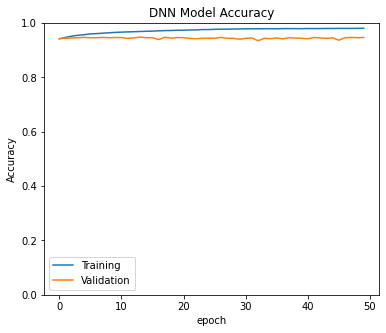

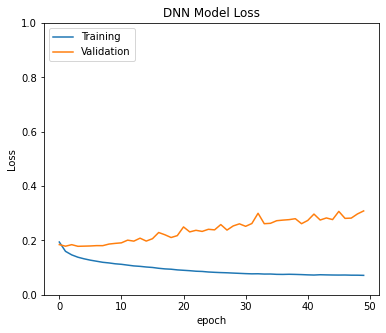

In [0]:
# Plotting graph of DNN model for loss

plt.figure(figsize=(6,5))
plt.plot(f1_history.history['accuracy'])
plt.plot(f1_history.history['val_accuracy'])
plt.title('DNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([0,1])

plt.legend(['Training', 'Validation'], loc='lower left')
plt.show()

# Plotting graph of DNN model for loss

plt.figure(figsize=(6,5))
plt.plot(f1_history.history['loss'])
plt.plot(f1_history.history['val_loss'])
plt.title('DNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.ylim([0,1])

plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [0]:
# DNN model Prediction

y_test = first_model.predict(X_test)

In [0]:
#saving predictions in dataframe

y_test_predictions = pd.DataFrame()
y_test_predictions["id"] = test_dataframe["id"]
y_test_predictions["ACTION"] = y_test
print(y_test_predictions)

#Saving results to csv file
y_test_predictions.to_csv("submission.csv", index = False)

          id    ACTION
12897  12898  0.997999
24407  24408  0.973148
49218  49219  0.982515
57192  57193  0.999929
7334    7335  0.999967
...      ...       ...
16782  16783  0.999277
35294  35295  0.995736
17732  17733  0.999848
18117  18118  0.999980
4609    4610  0.999993

[58921 rows x 2 columns]


<BarContainer object of 32 artists>

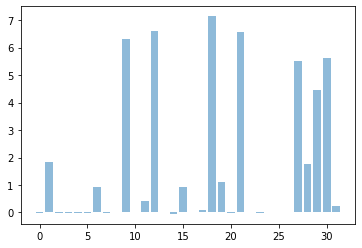

In [0]:
# Plot Weights for DNN model

nfw = first_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)









### **d. Model 5 - Dense Neural Network Model-L1 (DNN-L1)**







In [0]:
#Building L1 model for binary classification 

l1_model = keras.Sequential([
    keras.layers.Dense(60, activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                        input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(60, activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                        input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(60, activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                        input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32,activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                      ),
    keras.layers.Dense(16,activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                      ),
    keras.layers.Dense(1, activation= "sigmoid")
  ])


l1_model.compile(loss='binary_crossentropy', # mean squared error
                optimizer='adam',
                metrics=['accuracy'])  #mean absolute error
                
# no. of neurons in hidden layer=input+output/2 or 2/3 Input +output or 2 times input
# relu has to do with optimisation, easier to compute gradients

In [0]:

class PrintDot(keras.callbacks.Callback): # prints dot at the end of every epoch
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

# Store training stats

l1_history = l1_model.fit(X_train, y_train, epochs=50,
                    validation_data= (X_val, y_val), verbose=0,
                    callbacks=[PrintDot()])


..................................................

In [0]:
l1_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 60)                937620    
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout_5 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

In [0]:
# Accuracy of training dataset for neural network model 

scores = l1_model.evaluate(X_train, y_train)
print("\n Accuracy of training dataset for DNN L1 model: %s: %.2f%% " % (l1_model.metrics_names[1], scores[1]*100))

820/820 [==============================] - 2s 2ms/step - loss: 0.2210 - accuracy: 0.9423

 Accuracy of training dataset for DNN L1 model: accuracy: 94.23% 


In [0]:
# Accuracy of validation dataset for neural network model 

scores = l1_model.evaluate(X_val, y_val)
print("\n Accuracy of validation dataset for DNN L1 model: %s: %.2f%% " % (l1_model.metrics_names[1], scores[1]*100))

205/205 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9413

 Accuracy of validation dataset for DNN L1 model: accuracy: 94.13% 


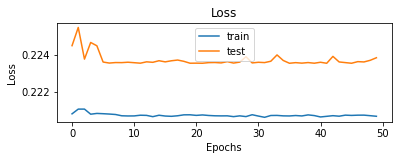

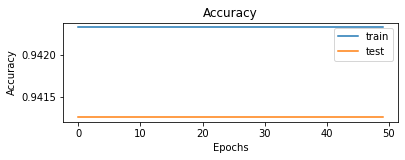

In [0]:
from matplotlib import pyplot

# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
	
  # evaluate the model
  _, train_acc = l1_model.evaluate(trainX, trainy, verbose=0)
  _, test_acc = l1_model.evaluate(testX, testy, verbose=0)

  # plot loss during training
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epochs')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()

  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.xlabel('Epochs')
  pyplot.ylabel('Accuracy')
  pyplot.legend()
  pyplot.show()
 
# evaluate model behavior
summarize_model(l1_model, l1_history, X_train, y_train, X_val, y_val)

<BarContainer object of 60 artists>

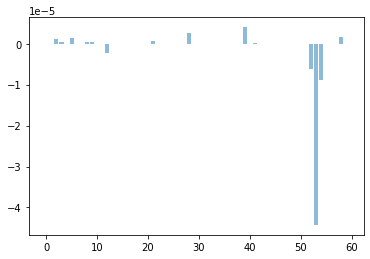

In [207]:
# Plot Weights for DNN L1 model

nfw = l1_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)

In [0]:
# DNN model Prediction

y_test = l1_model.predict(X_test)

In [0]:
#saving predictions in dataframe

y_test_predictions = pd.DataFrame()
y_test_predictions["id"] = test_dataframe["id"]
y_test_predictions["ACTION"] = y_test

#Saving results to csv file
y_test_predictions.to_csv("submission.csv", index = False)

In [270]:
print(y_test_predictions)

          id    ACTION
0      45592  0.999930
1      14790  0.968755
2      19059  0.993935
3      53316  0.999896
4       9752  0.990839
...      ...       ...
58916   3769  0.985596
58917  30902  0.998993
58918  25649  0.999950
58919  25141  0.987947
58920   8611  0.997783

[58921 rows x 2 columns]


In [0]:
#Converting probabilities in to target values 

y_test_predictions.loc[y_test_predictions['ACTION'] > 0.5] = 1
y_test_predictions.loc[y_test_predictions['ACTION'] <= 0.5] = 0

1.0    57211
0.0     1710
Name: ACTION, dtype: int64


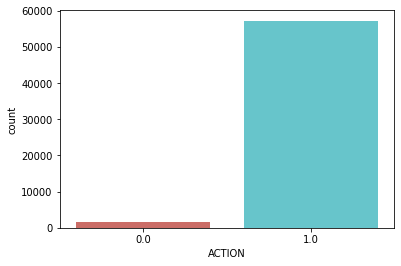

<Figure size 432x288 with 0 Axes>

In [284]:
# Target value count graph

print(y_test_predictions['ACTION'].value_counts())
sns.countplot(x='ACTION',data = y_test_predictions, palette='hls')
plt.show() 
plt.savefig('count_plot')

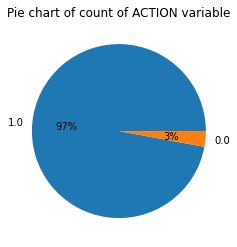

In [280]:
# Pie chart for counts of ACTION target variable for test dataframe

count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart of count of ACTION variable')
plt.ylabel('')
plt.show()

## **4. Model Comparison and Conclusion**


[Text(0, 0.5, 'Accuracy'),
 Text(0.5, 0, 'Models'),
 Text(0.5, 1.0, 'Model Comparison')]

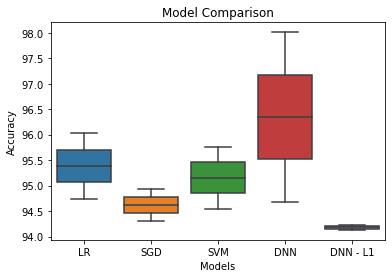

In [212]:
# Plotting accuracies of all models in a box plot

Accuracy_of_allModels = {'LR': [96.03, 94.74], 'SGD': [94.93, 94.31], 'SVM': [95.76, 94.54], 'DNN': [98.01, 94.68], 'DNN - L1': [94.23, 94.13]}
df = pd.DataFrame(data=Accuracy_of_allModels)
sns.boxplot(data=df).set(title = 'Model Comparison', xlabel = 'Models', ylabel = 'Accuracy' )



*   From above models, we can see that we have accuracies in between 94.13 to 98.01. But the generalization error gap is extremely less for Dense neural network L1 model, whereas its greater for Dense neural network model. 
*   This proves that with using regularization techniques we can improve the generalization gap as well as we can get comparatively good accuracy as well. Hence, we are getting better predictions and accuracy with DNN L1 model.
Best model is: DNN L1 with validation accuracy: 94.13%
